In [1]:
# Imports
import fasttext
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
# @title Figure Settings
import ipywidgets as widgets
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

In [3]:
# @title Helper functions
def cosine_similarity(vec_a, vec_b):
  """Compute cosine similarity between vec_a and vec_b"""
  return np.dot(vec_a, vec_b) / (np.linalg.norm(vec_a) * np.linalg.norm(vec_b))


def getSimilarity(word1, word2):
  v1 = ft_en_vectors.get_word_vector(word1)
  v2 = ft_en_vectors.get_word_vector(word2)
  return cosine_similarity(v1, v2)

In [4]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# For DL its critical to set the random seed so that students can have a
# baseline to compare their results to expected results.
# Read more here: https://pytorch.org/docs/stable/notes/randomness.html

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import torch

def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness.
  NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

# In case that `DataLoader` is used
def seed_worker(worker_id):
  """
  DataLoader will reseed workers following randomness in
  multi-process data loading algorithm.

  Args:
    worker_id: integer
      ID of subprocess to seed. 0 means that
      the data will be loaded in the main process
      Refer: https://pytorch.org/docs/stable/data.html#data-loading-randomness for more details

  Returns:
    Nothing
  """
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

In [5]:
# @title Set device (GPU or CPU). Execute `set_device()`

# Inform the user if the notebook uses GPU or CPU.

def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("WARNING: For this notebook to perform best, "
        "if possible, in the menu under `Runtime` -> "
        "`Change runtime type.`  select `GPU` ")
  else:
    print("GPU is enabled in this notebook.")

  return device

In [6]:
DEVICE = set_device()
SEED = 2021
set_seed(seed=SEED)

GPU is enabled in this notebook.
Random seed 2021 has been set.


In [7]:
import fasttext

def load_word_vectors(vec_file):
    word_vectors = {}
    with open(vec_file, 'r', encoding='utf-8') as f:
        # Skip the first line if it contains metadata
        if len(f.readline().split()) > 2:
            f.seek(0)

        # Iterate through each line and extract word embeddings
        for line in f:
            values = line.rstrip().split(' ')
            word = values[0]
            vector = [float(val) for val in values[1:]]
            word_vectors[word] = vector

    return word_vectors


In [8]:
from gensim.models import KeyedVectors

vec_file = '/kaggle/input/fasttext-aligned-word-vectors/wiki.en.align.vec'
ft_en_vectors = KeyedVectors.load_word2vec_format(vec_file, binary=False)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from gensim.models import KeyedVectors

vec_file = '/kaggle/input/fasttext-aligned-word-vectors/wiki.es.align.vec'
ft_es_vectors = KeyedVectors.load_word2vec_format(vec_file, binary=False)

In [10]:
# # vec_file = '/path/to/your_file.vec'
# ft_es_vectors = load_word_vectors('/kaggle/input/fasttext-aligned-word-vectors/wiki.es.align.vec')

In [11]:
# import fasttext.util
# # fasttext.util.download_model('en', if_exists='ignore')  # English
# ft_en_vectors = fasttext.load_model('/kaggle/input/fasttext-pretrained-crawl-vector-en-bin/cc.en.300.bin')

In [12]:
# import fasttext.util
# # fasttext.util.download_model('es', if_exists='ignore')  # English
# ft_es_vectors = fasttext.load_model('/kaggle/input/fasttext-spanish-300/cc.es.300.bin')

Lets see similarity without making bilingual embedding

In [13]:
# hello = ft_en_vectors.get_word_vector('hello')
# hi = ft_en_vectors.get_word_vector('hi')
# bonjour = ft_es_vectors.get_word_vector('bonjour')

# print(f"Cosine Similarity between HI and HELLO: {cosine_similarity(hello, hi)}")
# print(f"Cosine Similarity between BONJOUR and HELLO: {cosine_similarity(hello, bonjour)}")

In [14]:
# cat = ft_en_vectors.get_word_vector('cat')
# chatte = ft_es_vectors.get_word_vector('chatte')
# chat = ft_es_vectors.get_word_vector('chat')

# print(f"Cosine Similarity between cat and chatte: {cosine_similarity(cat, chatte)}")
# print(f"Cosine Similarity between cat and chat: {cosine_similarity(cat, chat)}")
# print(f"Cosine Similarity between chatte and chat: {cosine_similarity(chatte, chat)}")

In [15]:
# en_words = set(ft_en_vectors.words)
# es_words = set(ft_es_vectors.words)
# overlap = list(en_words & es_words)
# bilingual_dictionary = [(entry, entry) for entry in overlap]

In [16]:
# print(bilingual_dictionary)

In [17]:
# def make_training_matrices(source_dictionary, target_dictionary,
#                            bilingual_dictionary):
#   source_matrix = []
#   target_matrix = []
#   for (source, target) in tqdm(bilingual_dictionary):
#     # if source in source_dictionary.words and target in target_dictionary.words:
#     source_matrix.append(source_dictionary.get_word_vector(source))
#     target_matrix.append(target_dictionary.get_word_vector(target))
#   # return training matrices
#   return np.array(source_matrix), np.array(target_matrix)


# # from https://stackoverflow.com/questions/21030391/how-to-normalize-array-numpy
# def normalized(a, axis=-1, order=2):
#   """Utility function to normalize the rows of a numpy array."""
#   l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
#   l2[l2==0] = 1
#   return a / np.expand_dims(l2, axis)


# def learn_transformation(source_matrix, target_matrix, normalize_vectors=True):
#   """
#   Source and target matrices are numpy arrays, shape
#   (dictionary_length, embedding_dimension). These contain paired
#   word vectors from the bilingual dictionary.
#   """
#   # optionally normalize the training vectors
#   if normalize_vectors:
#     source_matrix = normalized(source_matrix)
#     target_matrix = normalized(target_matrix)
#   # perform the SVD
#   product = np.matmul(source_matrix.transpose(), target_matrix)
#   U, s, V = np.linalg.svd(product)
#   # return orthogonal transformation which aligns source language to the target
#   return np.matmul(U, V)

In [18]:
# source_training_matrix, target_training_matrix = make_training_matrices(ft_en_vectors, ft_es_vectors, bilingual_dictionary)

In [19]:
# transform = learn_transformation(source_training_matrix, target_training_matrix)

Let’s run the same examples as above, but this time, whenever we use French words, the matrix multiplies the embedding by the transpose of the transform matrix. That works a lot better!

In [20]:
# hello = ft_en_vectors.get_word_vector('hello')
# hi = ft_en_vectors.get_word_vector('hi')
# bonjour = np.matmul(ft_es_vectors.get_word_vector('bonjour'), transform.T)

# print(f"Cosine Similarity between HI and HELLO: {cosine_similarity(hello, hi)}")
# print(f"Cosine Similarity between BONJOUR and HELLO: {cosine_similarity(hello, bonjour)}")

In [21]:
# cat = ft_en_vectors.get_word_vector('cat')
# chatte = np.matmul(ft_es_vectors.get_word_vector('chatte'), transform.T)
# chat = np.matmul(ft_es_vectors.get_word_vector('chat'), transform.T)

# print(f"Cosine Similarity between cat and chatte: {cosine_similarity(cat, chatte)}")
# print(f"Cosine Similarity between cat and chat: {cosine_similarity(cat, chat)}")
# print(f"Cosine Similarity between chatte and chat: {cosine_similarity(chatte, chat)}")

Embeddings have now being obtained

In [22]:
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from gensim.models import KeyedVectors
import nltk
# nltk.download()
import nltk
import pandas as pd

In [23]:
# English
train_df_en = pd.read_csv('/kaggle/input/cleaned-data-eng/cleaned_train_df.csv')
val_df_en = pd.read_csv('/kaggle/input/cleaned-data-eng/cleaned_val_df.csv')
test_df_en = pd.read_csv('/kaggle/input/cleaned-data-eng/cleaned_test_df.csv')

# Spanish
train_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
val_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)
test_df_es = pd.read_csv('/kaggle/input/aaa1111/STS-train/data/stsb-multi-mt-main/data/stsb-es-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [24]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.linear_model import LinearRegression
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [25]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace numbers with num
    text = re.sub(r'\d+', '', text)
    # Lower case
    text= text.lower()
    sent_token = text.split()
    # Lemmatize
#     sent_token = [lemmatizer.lemmatize(word) for word in sent_token]
    # Stemming
#     sent_token = [ps.stem(word) for word in sent_token]
    return sent_token

In [26]:
# train_df_en['sent1'] = train_df_en['sent1'].apply(lambda x: preprocess_text(x))
# train_df_en['sent2'] = train_df_en['sent2'].apply(lambda x: preprocess_text(x))

train_df_es['sent1'] = train_df_es['sent1'].apply(lambda x: preprocess_text(x))
train_df_es['sent2'] = train_df_es['sent2'].apply(lambda x: preprocess_text(x))

# val_df_en['sent1'] = val_df_en['sent1'].apply(lambda x: preprocess_text(x))
# val_df_en['sent2'] = val_df_en['sent2'].apply(lambda x: preprocess_text(x))

val_df_es['sent1'] = val_df_es['sent1'].apply(lambda x: preprocess_text(x))
val_df_es['sent2'] = val_df_es['sent2'].apply(lambda x: preprocess_text(x))

# test_df_en['sent1'] = test_df_en['sent1'].apply(lambda x: preprocess_text(x))
# test_df_en['sent2'] = test_df_en['sent2'].apply(lambda x: preprocess_text(x))

test_df_es['sent1'] = test_df_es['sent1'].apply(lambda x: preprocess_text(x))
test_df_es['sent2'] = test_df_es['sent2'].apply(lambda x: preprocess_text(x))

In [27]:
total_sent_en = list(train_df_en['sent1']) + list(train_df_en['sent2'])
total_sent_es= list(train_df_es['sent1']) + list(train_df_es['sent2'])

In [28]:
word_dict_en = {}
for word_tokens in total_sent_en:
    for word in word_tokens:
        if word in word_dict_en:
            word_dict_en[word] += 1
        else:
            word_dict_en[word] = 1
            
vocab_length_en = len(word_dict_en)

word_dict_es = {}
for word_tokens in total_sent_es:
    for word in word_tokens:
        if word in word_dict_es:
            word_dict_es[word] += 1
        else:
            word_dict_es[word] = 1
            
vocab_length_es = len(word_dict_es)

In [29]:
def get_sorted_counter(word_counter):
    return {k: v for k, v in sorted(word_counter.items(), key=lambda item: item[1], reverse=False)}

In [30]:
sorted_counter_en = get_sorted_counter(word_dict_en)
sorted_counter_es = get_sorted_counter(word_dict_es)

In [31]:
train_df_en['sent1'] = train_df_en['sent1'].astype(str).apply(eval)
train_df_en['sent2'] = train_df_en['sent2'].astype(str).apply(eval)

train_df_es['sent1'] = train_df_es['sent1'].astype(str).apply(eval)
train_df_es['sent2'] = train_df_es['sent2'].astype(str).apply(eval)

val_df_en['sent1'] = val_df_en['sent1'].astype(str).apply(eval)
val_df_en['sent2'] = val_df_en['sent2'].astype(str).apply(eval)

val_df_es['sent1'] = val_df_es['sent1'].astype(str).apply(eval)
val_df_es['sent2'] = val_df_es['sent2'].astype(str).apply(eval)

test_df_en['sent1'] = test_df_en['sent1'].astype(str).apply(eval)
test_df_en['sent2'] = test_df_en['sent2'].astype(str).apply(eval)

test_df_es['sent1'] = test_df_es['sent1'].astype(str).apply(eval)
test_df_es['sent2'] = test_df_es['sent2'].astype(str).apply(eval)

In [32]:
import pandas as pd

# assuming train_df_en and train_df_es are already defined and loaded with data

# selecting the "sent1" column from train_df_en
sent1_en = train_df_en["sent1"] 

# selecting the "sent2" column from train_df_es
sent2_es = train_df_es["sent2"] 

score = train_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_one = pd.concat([sent1_en, sent2_es, score], axis=1)


# selecting the "sent1" column from train_df_en
sent1_en = train_df_en["sent2"] 

# selecting the "sent2" column from train_df_es
sent2_es = train_df_es["sent1"] 

score = train_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_two = pd.concat([sent1_en, sent2_es, score], axis=1)

final_train = pd.concat([new_df_one, new_df_two], ignore_index=True)
# printing the new dataframe
# final_train.len()

In [33]:
import pandas as pd

# assuming train_df_en and train_df_es are already defined and loaded with data

# selecting the "sent1" column from train_df_en
sent1_en = val_df_en["sent1"] 

# selecting the "sent2" column from train_df_es
sent2_es = val_df_es["sent2"] 

score = val_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_one = pd.concat([sent1_en, sent2_es, score], axis=1)


# selecting the "sent1" column from train_df_en
sent1_en = val_df_es["sent2"] 

# selecting the "sent2" column from train_df_es
sent2_es = val_df_es["sent1"] 

score = val_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_two = pd.concat([sent1_en, sent2_es, score], axis=1)

final_val = pd.concat([new_df_one, new_df_two], ignore_index=True)
# printing the new dataframe
# final_train.len()

In [34]:
import pandas as pd

# assuming train_df_en and train_df_es are already defined and loaded with data

# selecting the "sent1" column from train_df_en
sent1_en = test_df_en["sent1"] 

# selecting the "sent2" column from train_df_es
sent2_es = test_df_es["sent2"] 

score = test_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_one = pd.concat([sent1_en, sent2_es, score], axis=1)


# selecting the "sent1" column from train_df_en
sent1_en = test_df_es["sent2"] 

# selecting the "sent2" column from train_df_es
sent2_es = test_df_es["sent1"] 

score = test_df_en["score"] 

# concatenating the selected columns along with the "score" column
new_df_two = pd.concat([sent1_en, sent2_es, score], axis=1)

final_test = pd.concat([new_df_one, new_df_two], ignore_index=True)
# printing the new dataframe
# final_train.len()

In [35]:
train_sentences1 = list(final_train['sent1'])
train_sentences2 = list(final_train['sent2'])
train_similarity_scores = list(final_train['score'])

val_sentences1 = list(final_val['sent1'])
val_sentences2 = list(final_val['sent2'])
val_similarity_scores = list(final_val['score'])

test_sentences1 = list(final_test['sent1'])
test_sentences2 = list(final_test['sent2'])
test_similarity_scores = list(final_test['score'])

In [36]:
print(len(train_sentences1))

11498


In [37]:
def get_sentence_embedding_en(sentence, max_length=30):
    words = sentence
    # Filter out words that are not present in the model's vocabulary
    words = [word for word in words if word in ft_en_vectors.key_to_index]
    # Generate word embeddings for each word
    embeddings = [ft_en_vectors.get_vector(word) for word in words]
    # Mean strategy for combining word embeddings
    if embeddings:
        embedding = np.mean(embeddings, axis=0)
    else:
        embedding = np.zeros(ft_en_vectors.vector_size)  # Default embedding if no words are found
    return embedding

    
def get_sentence_embedding_es(sentence, max_length=30):
    words = sentence
    # Filter out words that are not present in the model's vocabulary
    words = [word for word in words if word in ft_es_vectors.key_to_index]
    # Generate word embeddings for each word
    embeddings = [ft_es_vectors.get_vector(word) for word in words]
    # Mean strategy for combining word embeddings
    if embeddings:
        embedding = np.mean(embeddings, axis=0)
    else:
        embedding = np.zeros(ft_es_vectors.vector_size)  # Default embedding if no words are found
    return embedding


In [38]:
# print( val_sentences2)

In [39]:
# generate sentence embeddings
train_X1 = np.array([get_sentence_embedding_en(sentence) for sentence in train_sentences1])
print("1")
train_X2 = np.array([get_sentence_embedding_es(sentence) for sentence in train_sentences2])
print("1")

val_X1 = np.array([get_sentence_embedding_en(sentence) for sentence in val_sentences1])
print("1")
val_X2 = np.array([get_sentence_embedding_es(sentence) for sentence in val_sentences2])
print("1")


test_X1 = np.array([get_sentence_embedding_en(sentence) for sentence in test_sentences1])
print("1")

test_X2 = np.array([get_sentence_embedding_es(sentence) for sentence in test_sentences2])

1
1
1
1
1


In [40]:
print(len(train_X2))

11498


In [41]:
train_X = np.concatenate([train_X1, train_X2], axis=1)
val_X = np.concatenate([val_X1, val_X2], axis=1)
test_X = np.concatenate([test_X1, test_X2], axis=1)

In [42]:
def sts_score(sim_score):
    sts_score = (sim_score+1) * 2.5
    return sts_score

In [43]:
from scipy import spatial
from scipy.stats import pearsonr

def get_sts_scores(emb1_lt, emb2_lt):
    y_pred = []
    for i in range(len(emb1_lt)):
        sim_score = 1 - spatial.distance.cosine(emb1_lt[i], emb2_lt[i])
        y_pred.append(sts_score(sim_score))
    return y_pred
    
def pearson_corr(y_true, y_pred):
    """
    Calculate Pearson correlation coefficient between two arrays.
    """
    corr, _ = pearsonr(y_true, y_pred)
    return corr

# Normalised Cosine Similarity

In [44]:
# import numpy as np
# import torch
# import fasttext.util
# from torch import nn
# from torch.utils.data import DataLoader

# # Load FastText embeddings
# ft_es_vectors = fasttext.load_model('/kaggle/input/fasttext-spanish-300/cc.es.300.bin')
# ft_en_vectors = fasttext.load_model('/kaggle/input/fasttext-pretrained-crawl-vector-en-bin/cc.en.300.bin')

# # Get the word vectors and corresponding words for both languages
# words_es = ft_es_vectors.get_words()
# vectors_es = np.array([ft_es_vectors.get_word_vector(word) for word in words_es])

# words_en = ft_en_vectors.get_words()
# vectors_en = np.array([ft_en_vectors.get_word_vector(word) for word in words_en])

# # Convert the word vectors to PyTorch tensors
# vectors_es_tensor = torch.from_numpy(vectors_es).float()
# vectors_en_tensor = torch.from_numpy(vectors_en).float()

# # Define a simple feed-forward neural network for mapping
# class MappingNetwork(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(MappingNetwork, self).__init__()
#         self.fc = nn.Linear(input_dim, output_dim)

#     def forward(self, x):
#         return self.fc(x)

# # Create the mapping network
# input_dim = vectors_es_tensor.shape[1]
# output_dim = vectors_en_tensor.shape[1]
# mapping_network = MappingNetwork(input_dim, output_dim)

# # Define the loss function and optimizer
# loss_fn = nn.MSELoss()
# optimizer = torch.optim.Adam(mapping_network.parameters(), lr=0.001)

# # Train the mapping network
# dataset = DataLoader(list(zip(vectors_es_tensor, vectors_en_tensor)), batch_size=10000, shuffle=True)

# num_epochs = 2
# total_steps = len(dataset) * num_epochs

# for epoch in range(num_epochs):
#     for step, batch in enumerate(dataset):
#         src_vectors, tgt_vectors = batch
#         optimizer.zero_grad()
#         mapped_vectors = mapping_network(src_vectors)
#         loss = loss_fn(mapped_vectors, tgt_vectors)
#         loss.backward()
#         optimizer.step()

#         # Calculate progress in percentage
#         progress = (epoch * len(dataset) + step + 1) / total_steps * 100

#         # Print epoch and progress
#     print(f"Epoch [{epoch+1}/{num_epochs}], Step [{step+1}/{len(dataset)}], Progress: {progress:.2f}%")
# print("!")
# # Map the source language word vectors to the target language space
# # mapped_vectors_es = mapping_network(vectors_es_tensor).detach().numpy()

# # Define batch size for processing
# batch_size = 1000

# # Calculate the total number of batches
# total_batches = int(np.ceil(len(vectors_es_tensor) / batch_size))

# # Create an empty array to store the mapped vectors
# mapped_vectors_es = []

# # Process the data in batches
# for i in range(total_batches):
#     start_idx = i * batch_size
#     end_idx = (i + 1) * batch_size

#     # Get a batch of source vectors
#     src_vectors_batch = vectors_es_tensor[start_idx:end_idx]

#     # Map the batch of source vectors to the target language space
#     mapped_vectors_batch = mapping_network(src_vectors_batch).detach().numpy()

#     # Append the mapped vectors to the results array
#     mapped_vectors_es.append(mapped_vectors_batch)

# # Concatenate the mapped vectors from all batches
# mapped_vectors_es = np.concatenate(mapped_vectors_es, axis=0)


# print("!")
# # Calculate cosine similarity between mapped source vectors and target vectors
# cos_sim_scores = np.dot(mapped_vectors_es, vectors_en.T) / (
#         np.linalg.norm(mapped_vectors_es, axis=1).reshape(-1, 1) * np.linalg.norm(vectors_en, axis=1))
# print("!")
# # 

# import numpy as np

# # Example English and Spanish sentences
# sentence_en = "I like cats"
# sentence_es = "Me gustan los gatos"
# print("!")
# # Tokenize the sentences into words
# tokens_en = sentence_en.lower().split()
# tokens_es = sentence_es.lower().split()
# print("!")
# # Calculate sentence embeddings by averaging word vectors
# embedding_en = np.mean([mapped_vectors_es[words_es.index(token)] for token in tokens_en], axis=0)
# embedding_es = np.mean([vectors_es[words_es.index(token)] for token in tokens_es], axis=0)
# print("!")
# # Calculate cosine similarity between sentence embeddings
# cos_sim = np.dot(embedding_en, embedding_es) / (np.linalg.norm(embedding_en) * np.linalg.norm(embedding_es))

# print("Cosine Similarity:", cos_sim)



In [45]:
# import numpy as np

# # Example English and Spanish sentences
# sentence_en = "I like cats"
# sentence_es = "Me gustan los gatos"

# # Tokenize the sentences into words
# tokens_en = sentence_en.lower().split()
# tokens_es = sentence_es.lower().split()

# # Calculate sentence embeddings by averaging word vectors
# embedding_en = np.mean([mapped_vectors_es[words_es.index(token)] for token in tokens_en], axis=0)
# embedding_es = np.mean([vectors_es[words_es.index(token)] for token in tokens_es], axis=0)

# # Calculate cosine similarity between sentence embeddings
# cos_sim = np.dot(embedding_en, embedding_es) / (np.linalg.norm(embedding_en) * np.linalg.norm(embedding_es))

# print("Cosine Similarity:", cos_sim)


In [46]:
# # Example of computing similarity between two words
# word_idx_es = list(words_es).index('manzana')
# word_idx_en = list(words_en).index('apple')
# similarity_score = cos_sim_scores[word_idx_es][word_idx_en]
# print("Similarity score between 'manzana' and 'apple':", similarity_score)

In [47]:
train_y_pred = get_sts_scores(train_X1, train_X2)
val_y_pred = get_sts_scores(val_X1, val_X2)
test_y_pred = get_sts_scores(test_X1, test_X2)

In [48]:
corr = pearson_corr(train_similarity_scores, train_y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.03


In [49]:
corr = pearson_corr(val_similarity_scores, val_y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.09


In [50]:
corr = pearson_corr(test_similarity_scores, test_y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.04


# Residual Analysis

In [51]:
# row_max_len = lambda row: max(len(row['sent1']), len(row['sent2']))

In [52]:
# train_df_en['sent_len'] = train_df_en.apply(row_max_len, axis=1)
# val_df_en['sent_len'] = val_df_en.apply(row_max_len, axis=1)
# test_df_en['sent_len'] = test_df_en.apply(row_max_len, axis=1)

# train_df_es['sent_len'] = train_df_es.apply(row_max_len, axis=1)
# val_df_es['sent_len'] = val_df_es.apply(row_max_len, axis=1)
# test_df_es['sent_len'] = test_df_es.apply(row_max_len, axis=1)

In [53]:
# train_df_en['diff'] = abs(train_df_en['score'] - train_y_pred)
# val_df_en['diff'] = abs(val_df_en['score'] - val_y_pred)
# test_df_en['diff'] = abs(test_df_en['score'] - test_y_pred)

# train_df_es['diff'] = abs(train_df_es['score'] - train_y_pred)
# val_df_es['diff'] = abs(val_df_es['score'] - val_y_pred)
# test_df_es['diff'] = abs(test_df_es['score'] - test_y_pred)

In [54]:
# grouped_df = train_df.groupby(['sent_len']).mean()


In [55]:
# grouped_df['sent_length'] = grouped_df.index

In [56]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.scatter(list(grouped_df.index), list(grouped_df['diff']))
# plt.title("average error trend in training data")
# plt.xlabel("sentence length")
# plt.ylabel("average difference")
# plt.show()

In [57]:
# grouped_val = val_df.groupby(['sent_len']).mean()

In [58]:
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.scatter(list(grouped_val.index), list(grouped_val['diff']))
# plt.title("average error trend in validation data")
# plt.xlabel("sentence length")
# plt.ylabel("average difference")
# plt.show()

In [59]:
# grouped_test = test_df.groupby(['sent_len']).mean()

In [60]:
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.scatter(list(grouped_test.index), list(grouped_test['diff']))
# plt.title("average error trend in test data")
# plt.xlabel("sentence length")
# plt.ylabel("average difference")
# plt.show()

# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
# train a linear regression model
reg = LinearRegression().fit(train_X, train_similarity_scores)

In [62]:
val_y_pred = reg.predict(val_X)

In [63]:
corr = pearson_corr(val_similarity_scores, val_y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.10


In [64]:
test_y_pred = reg.predict(test_X)

In [65]:
corr = pearson_corr(test_similarity_scores, test_y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.22


In [66]:
import torch
import torch.nn as nn
import torch.optim as optim

In [67]:
# Convert the data into PyTorch tensors
train_embeddings1 = torch.tensor(train_X1, dtype=torch.float)
train_embeddings2 = torch.tensor(train_X2, dtype=torch.float)
scores = torch.tensor(train_similarity_scores, dtype=torch.float)

In [68]:
val_embeddings1 = torch.tensor(val_X1, dtype=torch.float)
val_embeddings2 = torch.tensor(val_X2, dtype=torch.float)
val_scores = torch.tensor(val_similarity_scores, dtype=torch.float)

In [69]:
test_embeddings1 = torch.tensor(test_X1, dtype=torch.float)
test_embeddings2 = torch.tensor(test_X2, dtype=torch.float)
test_scores = torch.tensor(test_similarity_scores, dtype=torch.float)

In [70]:
# Define the hyperparameters
input_dim = 300 # The dimension of the sentence embeddings
hidden_dim = 150
lr = 0.01
num_epochs = 15
#batch_size = 10

In [71]:
# class BiLSTMRegression(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers):
#         super().__init__()
#         self.input_dim = input_dim
#         self.hidden_dim = hidden_dim
#         self.num_layers = num_layers
#         self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
#         self.fc = nn.Linear(hidden_dim*2, 1)

#     def forward(self, x1, x2):
#         x = torch.cat((x1, x2), dim=1)
#         x = x.view(len(x), 1, -1)
#         h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
#         c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
#         out, _ = self.bilstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
#         return out
    
class BiLSTMRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout_prob):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout_prob = dropout_prob
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.bilstm(x, (h0, c0))
        out = self.dropout(out) # Apply dropout
        out = self.fc(out[:, -1, :])
        return out

    

class GRURegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


class BiLSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, attention_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.attention_dim = attention_dim
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attention = SelfAttention(hidden_dim*2, attention_dim, 1)
        #self.attention = nn.Linear(hidden_dim*2, attention_dim)
        #self.softmax = nn.Softmax(dim=1)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.bilstm(x, (h0, c0))
        #att_weights = self.softmax(self.attention(out))
        att_weights = self.attention(out)
        out = torch.sum(out * att_weights, dim=1)
        out = self.fc(out)
        return out

class SelfAttention(nn.Module):
    """
    Implementation of the attention block
    """

    def __init__(self, input_size, hidden_size, output_size):
        super(SelfAttention, self).__init__()
        # TODO implement

        # constructing linear layers with weights analogous to Ws1 and Ws2
        self.layer1 = nn.Linear(input_size, hidden_size, bias=False)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=False)
        self.softmax = nn.Softmax(dim=1)

    ## the forward function would receive lstm's all hidden states as input
    def forward(self, attention_input):
        # TODO implement

        # implementing the attention mechanism
        output = self.layer1(attention_input)
        output = torch.tanh(output)
        output = self.layer2(output)
        #output = F.softmax(output.transpose(1,2), dim=2)
        output = self.softmax(output)

        return output

In [102]:
# model = GRURegression(input_dim*2, hidden_dim, num_layers=2)
# model = BiLSTMRegression(input_dim*2, hidden_dim, num_layers=2, dropout_prob = 0.3)
model = BiLSTMAttention(input_dim*2, hidden_dim, num_layers=2, attention_dim=600)

In [73]:
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

# Define the loss function
loss_fn = nn.MSELoss()

In [74]:
import torch.utils.data as data

# Define a custom dataset class
class SentenceSimilarityDataset(data.Dataset):
    def __init__(self, embeddings1, embeddings2, scores):
        self.embeddings1 = embeddings1
        self.embeddings2 = embeddings2
        self.scores = scores

    def __len__(self):
        return len(self.embeddings1)

    def __getitem__(self, index):
        return self.embeddings1[index], self.embeddings2[index], self.scores[index]

In [75]:
# Create the dataset
train_dataset = SentenceSimilarityDataset(train_embeddings1, train_embeddings2, scores)
val_dataset = SentenceSimilarityDataset(val_embeddings1, val_embeddings2, val_scores)

In [76]:
# Define the batch size
batch_size = 10

# Create the DataLoader
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [95]:
def train(model, optimizer, num_epochs, train_dataloader, val_dataloader):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch in train_dataloader:
            optimizer.zero_grad()
            embeddings1_batch, embeddings2_batch, scores_batch = batch
            output = model(embeddings1_batch, embeddings2_batch)
            loss = loss_fn(output.squeeze(), scores_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * len(embeddings1_batch)
        train_loss /= len(train_dataloader)
        train_losses.append(train_loss)

    # Evaluate the model on the validation set
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in val_dataloader:
                embeddings1_batch, embeddings2_batch, scores_batch = batch
                val_output = model(embeddings1_batch, embeddings2_batch)
                val_loss += loss_fn(val_output.squeeze(), scores_batch).item() * len(embeddings1_batch)
            val_loss /= len(val_dataloader)
            val_losses.append(val_loss)

        print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, train_loss, val_loss))
    return train_losses, val_losses

In [103]:
train_losses, val_losses = train(model, optimizer, num_epochs, train_dataloader, val_dataloader)


Epoch 1 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 2 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 3 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 4 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 5 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 6 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 7 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 8 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 9 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 10 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 11 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 12 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 13 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 14 - Training Loss: 96.1180, Validation Loss: 79.9345
Epoch 15 - Training Loss: 96.1180, Validation Loss: 79.9345


In [79]:
#BiGRU Analysis

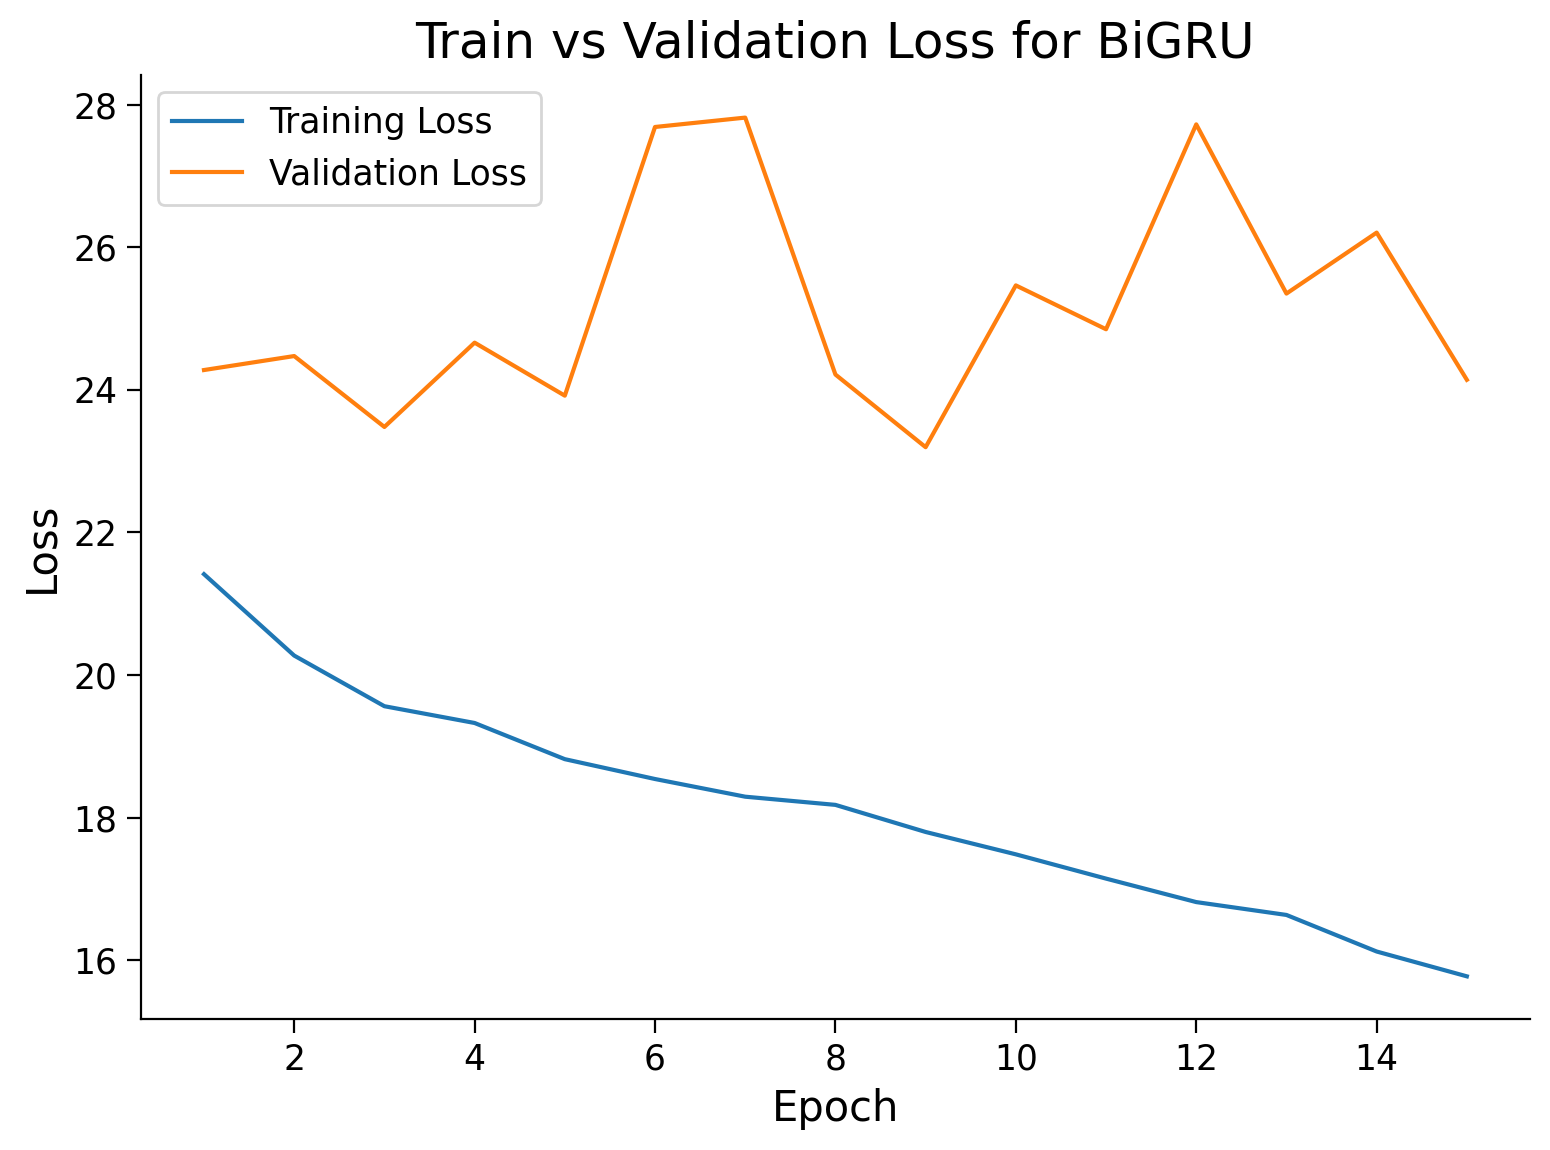

	 More Data needed	


In [80]:
import matplotlib.pyplot as plt



# Define the data
epochs = range(1, 16)
#train_losses = train_loss
#val_losses = val_loss

# Plot the data
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss for BiGRU')

# Add legend
plt.legend()

# Show the plot
plt.show()
print("\t More Data needed\t")

In [81]:
def evaluate(model, emb1, emb2):
    model.eval()
    with torch.no_grad():
        test_output = model(emb1, emb2)
    y_pred_test = test_output.squeeze().tolist()
    return y_pred_test

In [82]:
y_pred = evaluate(model, train_embeddings1, train_embeddings2)
corr = pearson_corr(train_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.58


In [83]:
y_pred = evaluate(model, val_embeddings1, val_embeddings2)
corr = pearson_corr(val_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.16


In [84]:
y_pred_test = evaluate(model, test_embeddings1, test_embeddings2)
corr = pearson_corr(test_similarity_scores, y_pred_test)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.24


In [85]:
len(train_losses), len(val_losses)

(15, 15)

In [86]:
#BiLstm Analysis

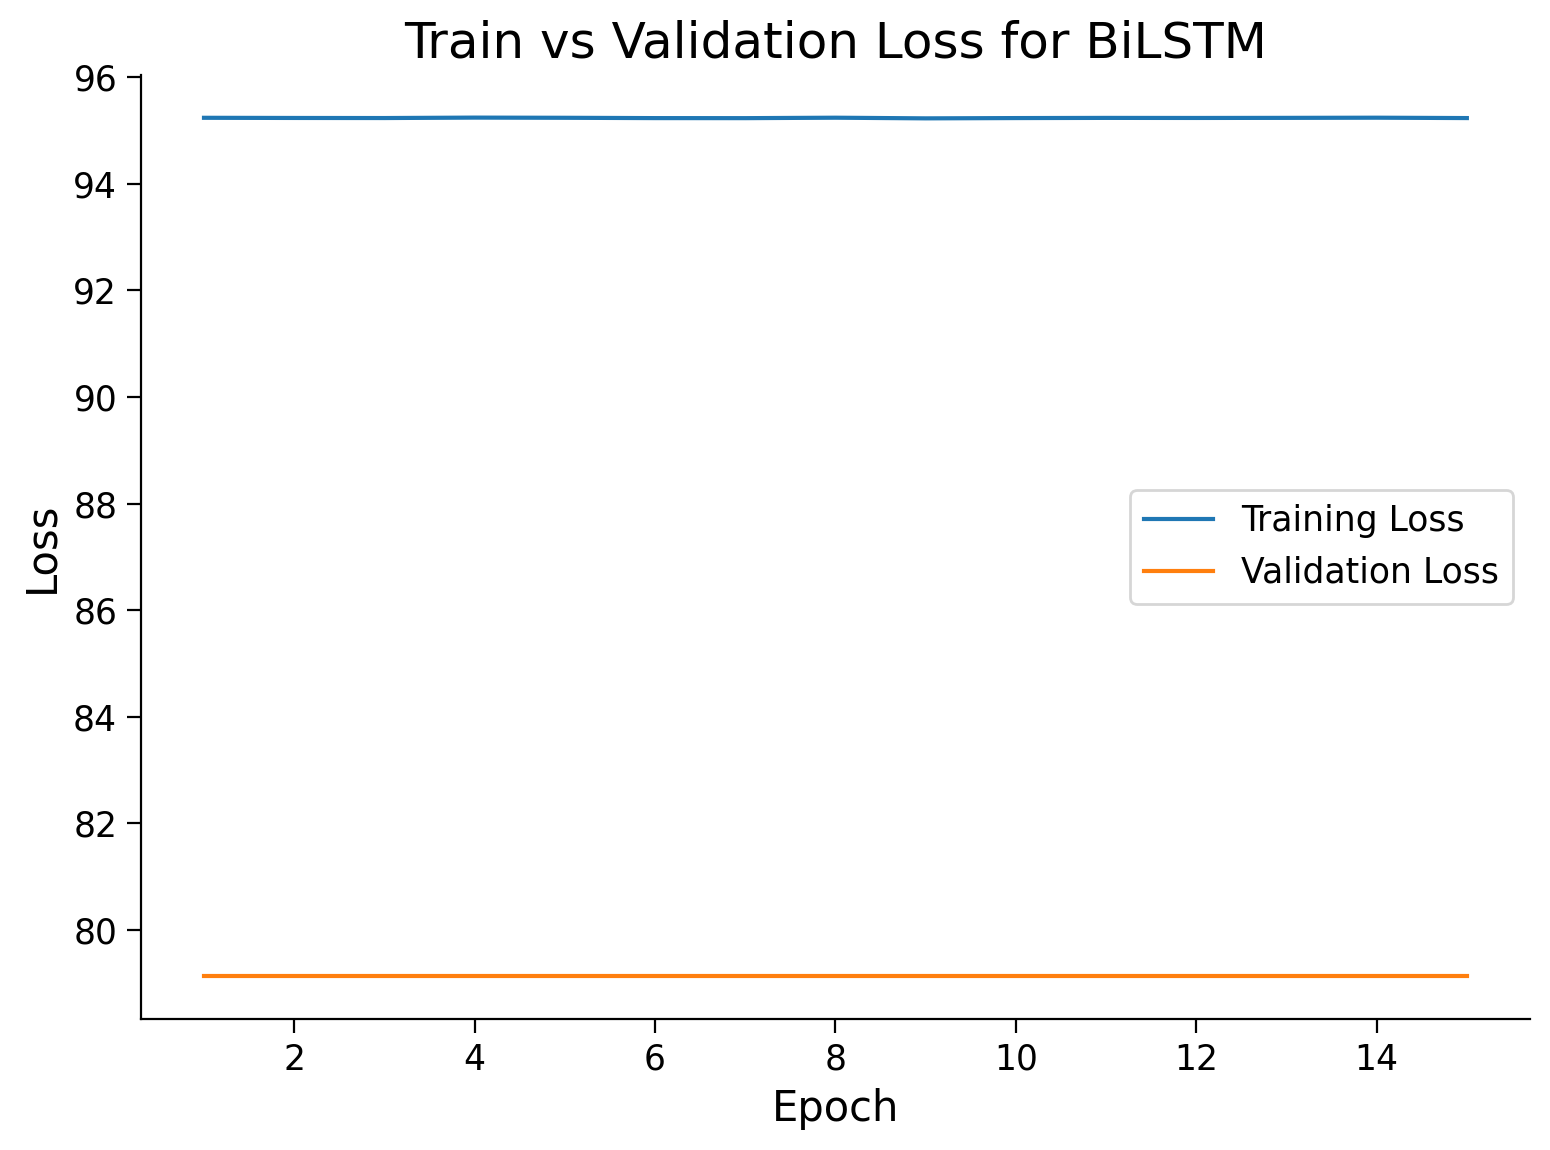

	 Overfitting due to model complexity	


In [97]:
import matplotlib.pyplot as plt



# Define the data
epochs = range(1, 16)
#train_losses = train_loss
#val_losses = val_loss

# Plot the data
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss for BiLSTM')

# Add legend
plt.legend()

# Show the plot
plt.show()
print("\t Overfitting due to model complexity\t")

In [98]:
y_pred = evaluate(model, train_embeddings1, train_embeddings2)
corr = pearson_corr(train_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: -0.04


In [99]:
y_pred = evaluate(model, val_embeddings1, val_embeddings2)
corr = pearson_corr(val_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: -0.02


In [100]:
y_pred_test = evaluate(model, test_embeddings1, test_embeddings2)
corr = pearson_corr(test_similarity_scores, y_pred_test)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: -0.03


In [105]:
len(train_losses), len(val_losses)

(15, 15)

In [92]:
# BiLSTM Attention analysis

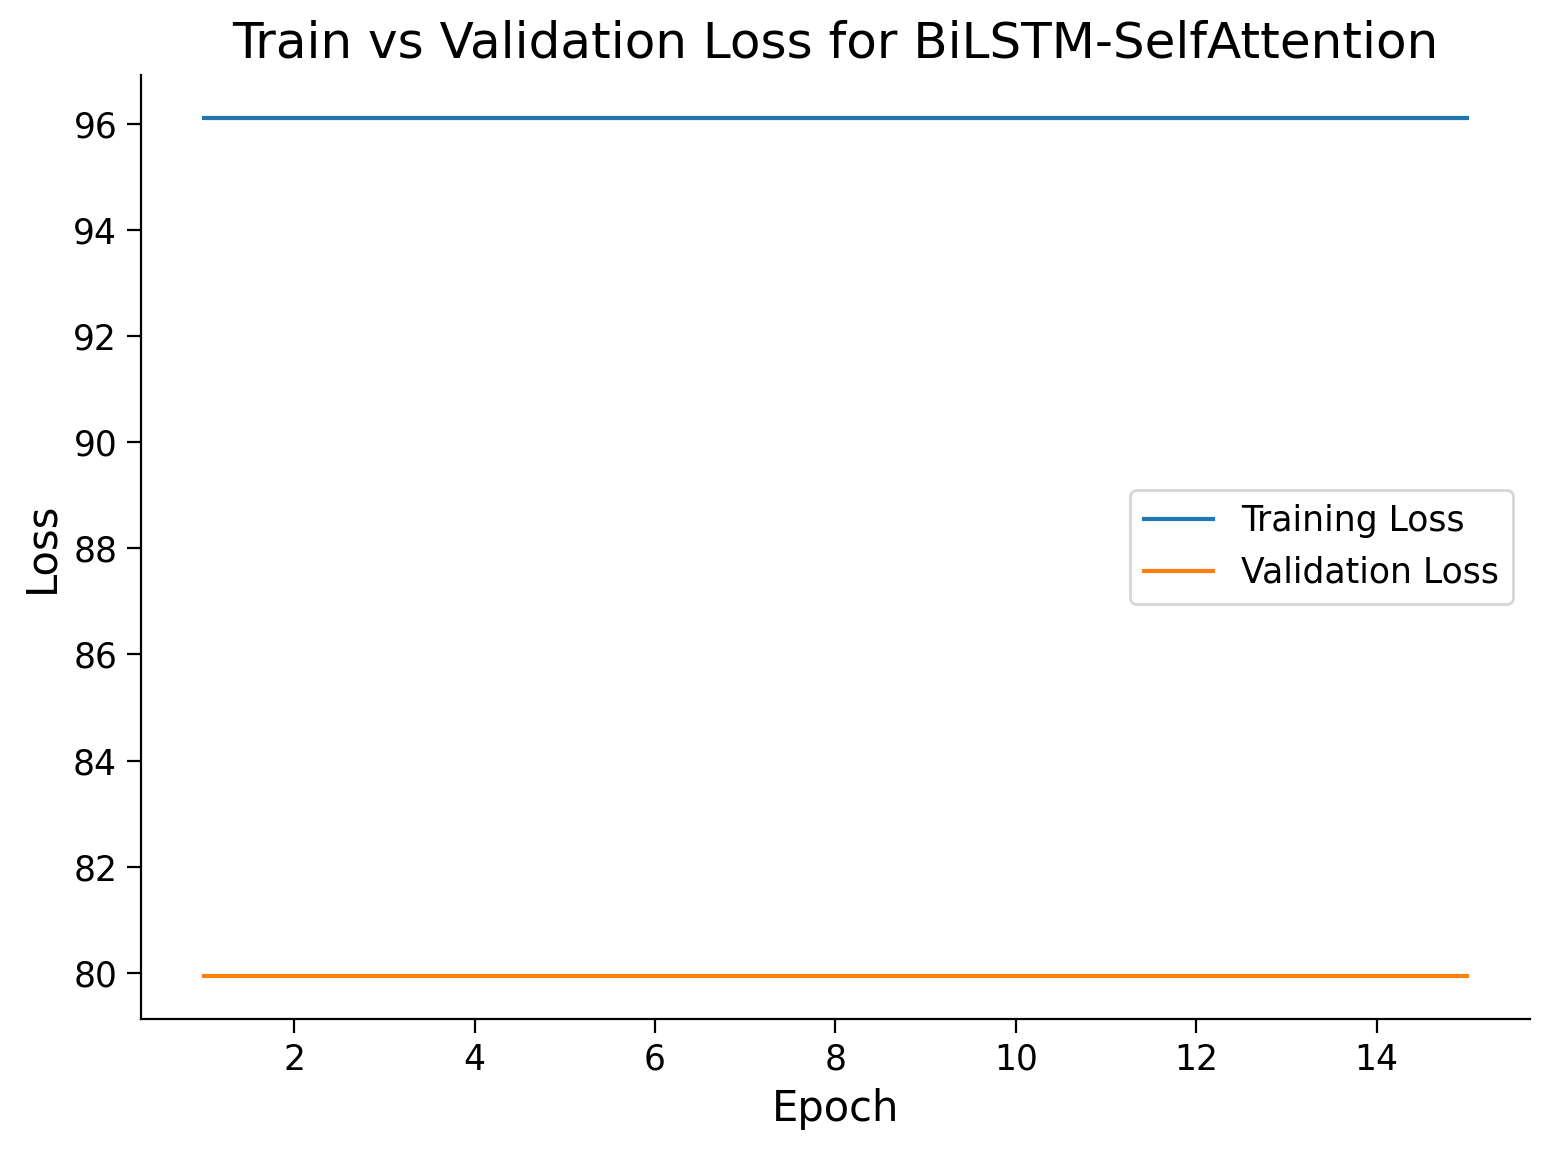

	 Overfitting due to model complexity	


In [106]:
import matplotlib.pyplot as plt



# Define the data
epochs = range(1, 16)
#train_losses = train_loss
#val_losses = val_loss

# Plot the data
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss for BiLSTM-SelfAttention')

# Add legend
plt.legend()

# Show the plot
plt.show()
print("\t Overfitting due to model complexity\t")

In [ ]:
# Apply on train and validation data


In [107]:
def evaluate(model, emb1, emb2):
    model.eval()
    with torch.no_grad():
        test_output = model(emb1, emb2)
    y_pred_test = test_output.squeeze().tolist()
    return y_pred_test

In [109]:
y_pred = evaluate(model, train_embeddings1, train_embeddings2)
corr = pearson_corr(train_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.03


In [108]:
y_pred = evaluate(model, val_embeddings1, val_embeddings2)
corr = pearson_corr(val_similarity_scores, y_pred)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: -0.01


In [110]:
y_pred_test = evaluate(model, test_embeddings1, test_embeddings2)
corr = pearson_corr(test_similarity_scores, y_pred_test)
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.03
